# European IT Salary Analysis Project

## Names: Tony Tran

## Netids: Tvt2005

Table of Content:
- Executive Summary
- 1.Importing:
- 2.Data Cleaning
- 3.Manipulating Data
- 4.Data Exploratory & Data Distribution
- 5.Data Visualization
- Big Question 1: Does a Wage Gap Exist Between Female and Males?
- Big Question 2: Who is Most Likely to Lose Their Jobs During Covid?
- Big Question 3: What are the Characteristics of Those Who See an Annual Decrease in Their Salaries?
- Big Question 4: What are the Characteristics of the Different Company Sizes?
- Regression on Base Salary

# Executive Summary

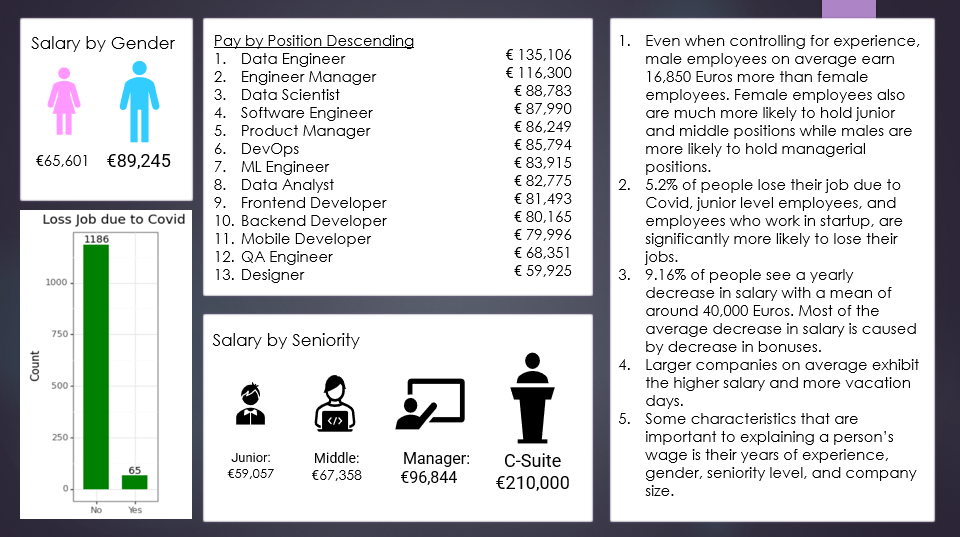

In [1]:
#Display Executive Summary
from PIL import Image
myImage = Image.open('Executive_Summary.png')
display(myImage)

# 1. Importing

In [2]:
#Import
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
%matplotlib inline
import scipy.stats
from statsmodels.formula.api import ols

In [3]:
#Read and take a look into the dataset
df = pd.read_csv('IT Salary Survey EU  2020.csv')

#Make the column name spaces to underscore
df.columns = [c.replace(' ', '_') for c in df.columns]

#Replace some of the long names to shorter ones to make it easier to work with
df.rename({'Yearly_bonus_+_stocks_in_EUR': 'Yearly_bonus_and_stocks_in_EUR','Annual_bonus+stocks_one_year_ago._Only_answer_if_staying_in_same_country':'Annual_bonus_and_stocks_one_year_ago'}, axis=1, inplace=True)
df.rename({'Yearly_brutto_salary_(without_bonus_and_stocks)_in_EUR': 'Base_salary','Annual_brutto_salary_(without_bonus_and_stocks)_one_year_ago._Only_answer_if_staying_in_the_same_country':'Base_salary_one_year_ago'}, axis=1, inplace=True)
df.rename({'Have_you_received_additional_monetary_support_from_your_employer_due_to_Work_From_Home?_If_yes,_how_much_in_2020_in_EUR': 'Monetary_support'}, axis=1, inplace=True)
df.rename({'Have_you_been_forced_to_have_a_shorter_working_week_(Kurzarbeit)?_If_yes,_how_many_hours_per_week': 'Kuzarbeit'}, axis=1, inplace=True)
df.head()


,Timestamp,Age,Gender,City,Position_,Total_years_of_experience,Years_of_experience_in_Germany,Seniority_level,Your_main_technology_/_programming_language,Other_technologies/programming_languages_you_use_often,...,Annual_bonus_and_stocks_one_year_ago,Number_of_vacation_days,Employment_status,Сontract_duration,Main_language_at_work,Company_size,Company_type,Have_you_lost_your_job_due_to_the_coronavirus_outbreak?,Kuzarbeit,Monetary_support
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


## 2. Data Cleaning

In [4]:
#Let's check the max to see if everything is normal or not
df.max().to_frame().rename(columns = {0:'Max'})

C:\Users\Tony\AppData\Local\Temp/ipykernel_31428/3207701105.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Max
Timestamp,31/12/2020 17:56:25
Age,69.0
City,warsaw
Base_salary,99999999999.0
Base_salary_one_year_ago,500000000.0
Kuzarbeit,40.0


When checking the maximum of each of the column, we observe two phenomnoms:

1) The max is extremely large for base salary and base salary one year ago, these are probably mistakes, not that someone is earning this much in one year. We will remove the row of these two values. 

2) Some rows that are meant to be float like the bonuses are not shown, this mean that there might be strings in these column that are making the max method not working

In [5]:
#Check the rows of max base salary and max base salary one year ago
print("The maximum base salary is located in row:",df['Base_salary'].idxmax())
print('The maximum base salary one year ago is located in row:',df['Base_salary_one_year_ago'].idxmax())

The maximum base salary is located in row: 473
The maximum base salary one year ago is located in row: 853


Since these two are located in different rows, we can delete both of these rows.

In [6]:
#Remove the outlier for base salary
df = df[df.Base_salary != df['Base_salary'].max()]
df = df[df.Base_salary_one_year_ago != df['Base_salary_one_year_ago'].max()]

In [7]:
#Let's recheck the maximum value
df.max()

C:\Users\Tony\AppData\Local\Temp/ipykernel_31428/2564221347.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Timestamp                   31/12/2020 17:56:25
Age                                        69.0
City                                     warsaw
Base_salary                            850000.0
Base_salary_one_year_ago               760000.0
Kuzarbeit                                  40.0
dtype: object

These max values look much more reasonable than the previously observed max. But wer are still missing max from many columns.

In [8]:
"""
After manually looking through the dataframe, there are strings in the:
    1) Total years of experience
    2) Years_of_experience_in_Germany
    3) Yearly_bonus_and_stocks_in_EUR
    4) Annual_bonus_and_stocks_one_year_ago
    5) Number_of_vacation_days
    6) Monetary_support
    
We will transform all into numeric and make all strings to NaN
"""

df['Total_years_of_experience'] = pd.to_numeric(df['Total_years_of_experience'],errors='coerce')
df['Years_of_experience_in_Germany'] = pd.to_numeric(df['Years_of_experience_in_Germany'],errors='coerce')
df['Yearly_bonus_and_stocks_in_EUR'] = pd.to_numeric(df['Yearly_bonus_and_stocks_in_EUR'],errors='coerce')
df['Annual_bonus_and_stocks_one_year_ago'] = pd.to_numeric(df['Annual_bonus_and_stocks_one_year_ago'],errors='coerce')
df['Number_of_vacation_days'] = pd.to_numeric(df['Number_of_vacation_days'],errors='coerce')
df['Monetary_support'] = pd.to_numeric(df['Monetary_support'],errors='coerce')


In [9]:
#Let's check the max again
df.max().to_frame().rename(columns = {0:'Max'})

C:\Users\Tony\AppData\Local\Temp/ipykernel_31428/2886328381.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Max
Timestamp,31/12/2020 17:56:25
Age,69.0
City,warsaw
Total_years_of_experience,383.0
Years_of_experience_in_Germany,30.0
Base_salary,850000.0
Yearly_bonus_and_stocks_in_EUR,1150000.0
Base_salary_one_year_ago,760000.0
Annual_bonus_and_stocks_one_year_ago,300000.0
Number_of_vacation_days,365.0


In [10]:
#Remove the outlier in number of vacation days and total years of experience
df['Number_of_vacation_days'].replace(365, np.NaN,inplace=True)
df['Total_years_of_experience'].replace(383, np.NaN,inplace=True)
df.max().to_frame().rename(columns = {0:'Max'})

C:\Users\Tony\AppData\Local\Temp/ipykernel_31428/2299695921.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Max
Timestamp,31/12/2020 17:56:25
Age,69.0
City,warsaw
Total_years_of_experience,40.0
Years_of_experience_in_Germany,30.0
Base_salary,850000.0
Yearly_bonus_and_stocks_in_EUR,1150000.0
Base_salary_one_year_ago,760000.0
Annual_bonus_and_stocks_one_year_ago,300000.0
Number_of_vacation_days,60.0


Everything looks reasonable now. One other thing we want to do is when a person leaves the column bonus blank, this usually mean that they have 0 bonuses. So we will replace all nan in yearly bonus to 0.

In [11]:
#In the column Yearly_bonus_and_stocks_in_EUR, if the value is empty, we will replace it with 0.
#We are assuming that those who do not fill out this column have 0 bonus.
df['Yearly_bonus_and_stocks_in_EUR'].fillna(0, inplace=True)
df['Yearly_bonus_and_stocks_in_EUR'].head()

0      5000.0
1         0.0
2    120000.0
3         0.0
4         0.0
Name: Yearly_bonus_and_stocks_in_EUR, dtype: float64

In [12]:
#We will do the same for last year
df['Annual_bonus_and_stocks_one_year_ago'].fillna(0, inplace=True)

# 3.Manipulating Data

## 3.1 Determine Number of Main Language

**The purpose of this section is to write a code to translate text input to an int that represents how many different languages a programmer use for his / her main language**

To achieve this, since we know that each language is either seperated by a , or a / from looking at the data, we can count how many , and / in each input and add 1 to get the number of languages inputted.

In [13]:
#Count how many , and / in each cell and add 1 to count how many main languages each programmer know. Store in "no_of_main_lang"
no_of_main_lang = []
for index,language in enumerate(df['Your_main_technology_/_programming_language']):
    if type(language) == str:
        a = language.count(",")
        b = language.count('/')
        no_of_main_lang.append(a+b+1)
    else:
        no_of_main_lang.append(0)
df['no_of_main_lang'] = no_of_main_lang 
df['no_of_main_lang'] = df['no_of_main_lang'].astype(int)

#Check that everything is normal
df['no_of_main_lang'].sort_values(ascending = False).to_frame()

,no_of_main_lang
742,6
634,5
579,5
617,5
1168,4
...,...
279,0
94,0
93,0
701,0


## 3.2 Determine Number of Other Language

**The same as 4.1 for but this time for other languages**

In [14]:
#Count how many , and / in each cell and add 1 to count how many other languages each programmer know. Store in "no_of_other_lang"
no_of_other_lang = []
for index,language in enumerate(df['Other_technologies/programming_languages_you_use_often']):
    if type(language) == str:
        a = language.count(",")
        b = language.count('/')
        no_of_other_lang.append(a+b+1)
    else:
        no_of_other_lang.append(0)
df['no_of_other_lang'] = no_of_other_lang 
df['no_of_other_lang'] = df['no_of_other_lang'].astype(int)

In [15]:
#Check to see if everything works
df['no_of_other_lang'].sort_values(ascending = False).to_frame()

,no_of_other_lang
558,15
576,14
292,13
180,12
1250,12
...,...
974,0
540,0
263,0
1056,0


## 3.3 Creating Total_no_of_lang

The total number of language column (Total_no_of_lang) would indicate how many programming languages each employee know. This is done by adding up the integers in the main languages to the numbers in the other languages.

In [16]:
df['Total_no_of_lang'] = df['no_of_main_lang'] + df['no_of_other_lang']
df['Total_no_of_lang'].sort_values(ascending = False).to_frame()

,Total_no_of_lang
558,16
576,15
742,15
292,14
180,13
...,...
204,0
534,0
815,0
1011,0


## 3.4 Grouping Senority Level by Experience

In the senority level, there are too many seniority levels which can make it hard to classify, so we will group them into 5 broader groups: unknown, junior, middle, manager, and c-level. 

In [17]:
#Find the unique values of senority levels
seniority = df['Seniority_level'].unique()
seniority

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'VP', 'Manager', 'Work Center Manager', 'CTO', 'No level ',
       'Director', 'Key', 'C-level executive manager', 'Principal',
       'intern', 'Student', 'no idea, there are no ranges in the firm ',
       'C-Level', 'Working Student', 'Entry level', 'Intern', 'student',
       'Self employed'], dtype=object)

In [18]:
#Classify according to the 5 classes of senority : unknown, junior, middle, manager, and c_level
seniority.tolist()
unknown = [seniority[i] for i in [5,6,11,13,18,24]]
junior = [seniority[i] for i in [2,16,17,20,21,22,23]]
middle = [seniority[i] for i in [3]]
manager = [seniority[i] for i in [0,1,4,8,9,12,15,]]
c_level = [seniority[i] for i in [7,10,14,19]]

In [19]:
#Create a function classify that takes in the level in the seniority level column and return one of the five classes
def classify(level):
    if level in unknown:
        return 'Unknown'
    elif level in junior:
        return 'Junior'
    elif level in middle:
        return 'Middle'
    elif level in manager:
        return 'Manager'
    elif level in c_level:
        return 'C_level'
    else:
        return 'Error'

In [20]:
#Create a Level column converting the seniority level into one of the five categories
senority_list = []
for senority in df['Seniority_level']:
    senority_list.append(classify(senority))
df['Level'] = senority_list
df.head()

,Timestamp,Age,Gender,City,Position_,Total_years_of_experience,Years_of_experience_in_Germany,Seniority_level,Your_main_technology_/_programming_language,Other_technologies/programming_languages_you_use_often,...,Main_language_at_work,Company_size,Company_type,Have_you_lost_your_job_due_to_the_coronavirus_outbreak?,Kuzarbeit,Monetary_support,no_of_main_lang,no_of_other_lang,Total_no_of_lang,Level
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,English,51-100,Product,No,NaN,NaN,1,3,4,Manager
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,NaN,...,English,101-1000,Product,No,NaN,NaN,1,0,1,Manager
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,English,101-1000,Product,Yes,NaN,NaN,2,3,5,Manager
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,NaN,...,English,51-100,Startup,No,NaN,NaN,1,0,1,Junior
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",...,English,101-1000,Product,No,NaN,NaN,1,4,5,Manager


In [21]:
#See if we have any error in the Level
df['Level'].unique()

array(['Manager', 'Junior', 'Middle', 'Unknown', 'C_level'], dtype=object)

Now the level column broadly classifies the seniority level and can be more easily used for analysis.

## 3.5 Creating Yearly Salary and Yearly Salary Last Year

A yearly salary is the sum of the base salary and the bonus that each employee gets.

In [22]:
#For this year
df['Total_salary'] = df["Base_salary"] + df['Yearly_bonus_and_stocks_in_EUR']
df['Total_salary'].sort_values(ascending = False).to_frame()

,Total_salary
564,1240000.0
778,945000.0
630,700000.0
966,400000.0
574,400000.0
...,...
1135,11500.0
770,11000.0
366,10164.0
883,10001.0


In [23]:
#For last year
df['Total_salary_last'] = df["Base_salary_one_year_ago"] + df['Annual_bonus_and_stocks_one_year_ago']
df['Total_salary_last'].sort_values(ascending = False).to_frame()

,Total_salary_last
658,780000.0
630,530000.0
966,400000.0
279,320000.0
1186,290000.0
...,...
1232,NaN
1234,NaN
1235,NaN
1238,NaN


## 3.6 Company Type

In [24]:
#Print Company type unique values
df['Company_type'].value_counts()

Product                760
Startup                251
Consulting / Agency    142
Bank                     5
Media                    3
                      ... 
Publisher                1
Energy                   1
Enterprise               1
service                  1
eCommerce                1
Name: Company_type, Length: 63, dtype: int64

From the above table, we can see that although there are many types of companies, there are only 3 main ones: Product, Startup, Consulting and Agency. So to make the analysis easier, we will only consider the company types as Product, startup, consulting / agency, and everything else will be labelled as "Others".

In [25]:
company_type = []
for values in df['Company_type']:
    if values == "Product" or values == "Startup" or values == "Consulting / Agency":
        company_type.append(values)
    else:
        company_type.append("Others")
df['Company_type'] = company_type
df['Company_type'].unique()

array(['Product', 'Startup', 'Consulting / Agency', 'Others'],
      dtype=object)

# 4. Data Explatory & Data Distribution

**What are the characteristics of the different columns in the data?**?<br/>
This section aims at exploring the summary of the data.

In [26]:
df.describe().round(2)

,Age,Total_years_of_experience,Years_of_experience_in_Germany,Base_salary,Yearly_bonus_and_stocks_in_EUR,Base_salary_one_year_ago,Annual_bonus_and_stocks_one_year_ago,Number_of_vacation_days,Kuzarbeit,Monetary_support,no_of_main_lang,no_of_other_lang,Total_no_of_lang,Total_salary,Total_salary_last
count,1225.00,1228.00,1193.00,1251.00,1251.00,884.00,1251.00,1170.00,372.00,410.00,1251.00,1251.00,1251.0,1251.00,884.00
mean,32.51,8.78,3.76,71654.96,14168.19,67350.22,10515.97,28.00,13.00,476.70,1.02,3.58,4.6,85823.15,81622.03
std,5.67,5.27,3.66,32818.27,44584.27,31542.38,25731.89,3.83,15.28,862.73,0.56,2.54,2.7,61236.79,47285.98
min,20.00,0.00,0.00,10001.00,0.00,11000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,10001.00,11500.00
25%,29.00,5.00,1.00,58400.00,0.00,55000.00,0.00,27.00,0.00,0.00,1.00,2.00,3.0,60000.00,58400.25
50%,32.00,8.00,3.00,70000.00,0.00,65000.00,0.00,28.00,0.00,250.00,1.00,3.00,5.0,74000.00,70200.00
75%,35.00,12.00,5.00,80000.00,9200.00,75000.00,5000.00,30.00,30.00,600.00,1.00,5.00,6.0,91000.00,90000.00
max,69.00,40.00,30.00,850000.00,1150000.00,760000.00,300000.00,60.00,40.00,10000.00,6.00,15.00,16.0,1240000.00,780000.00


From the summary of the mean and median, we can see the following:
>1) The average person in the IT industry in Europe is around 32 years of age with around 8-9 years of experience.<br/>
2) The median salary (Total_salary) of a person in the IT industry is around 74,000 Euros anually with an average being almost 86,000 Euros.<br/>
3) Compared to themselves last year, people in the IT industry in Europe this year earned around 4,000 Euros more.<br/>
4) A worker on average takes 28 vacation days every year<br/>
5) An average worker usually knows 5 languages and on average only use 1 main language

**4.2 Exploring distributions and different variables through charts**\
**4.2.1 Salary Distribution**<br/>
This section explores how the salary of the IT industry in Europe is distributed.

C:\Users\Tony\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 35'. Pick better value with 'binwidth'.
C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_bin : Removed 29 rows containing non-finite values.
C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


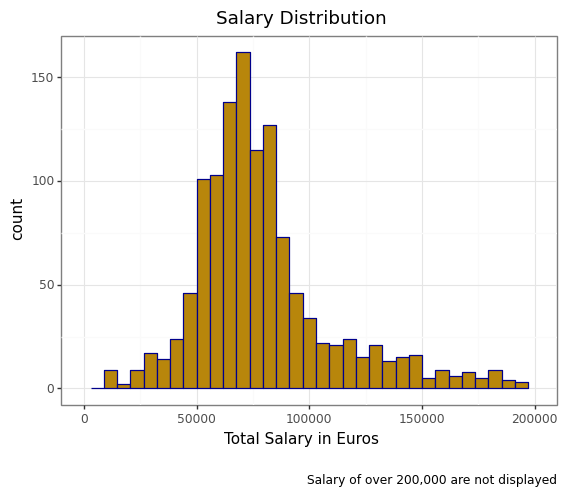

<ggplot: (125963522130)>

In [27]:
#Plotting the distribution of salary
(ggplot(data = df, mapping = aes(x = "Total_salary")) +
        geom_histogram(fill = '#B8860B', color = "#00008B")+
        xlim(0,200000) +
        labs(caption = "\nSalary of over 200,000 are not displayed",
             title = "Salary Distribution") +
        xlab("Total Salary in Euros") +
        theme_bw()
        )

Since the mean of the salary is more than 10,000 euros larger than the median, we would expect the distribution of the average total salary to be skewed right. This is exactly what had happened when we graph the histogram of the total salary.

**4.2.2 Bonus Distribution**<br/>
This section explores how the bonus in the IT industry is distrbuted.

C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.
C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


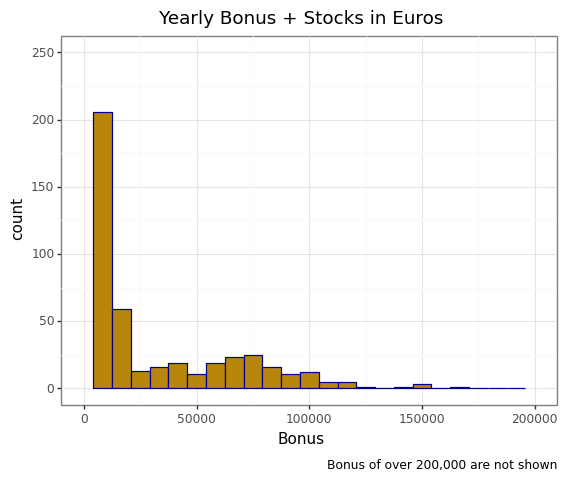

<ggplot: (125963576086)>

In [28]:
#Graph Yearly Bonus
(ggplot(data = df, mapping = aes(x = "Yearly_bonus_and_stocks_in_EUR")) +
        geom_histogram(bins = 25,fill = '#B8860B', color = "#00008B")+
        labs(caption = "Bonus of over 200,000 are not shown",
            title = "Yearly Bonus + Stocks in Euros") +
        xlab("Bonus") +
         ylim(0,250) +
        xlim(0,200000) +
        theme_bw()
        )

The histogram of the bonus shows us that the majority of IT workers do not receive bonus and if they do, most likely it is not significant. However, the distribution is once again skewed right and we find that some people do receive huge amount of bonuses.

# 5. Data Visualization

**5.1 Bar chart of salary by seniority**<br/>
This bar graph aim at showing which seniority on average have the highest pay. It aims to help people visualizes how much wage increase as the seniority level increase.

In [29]:
#Create a dataframe that groups by level and show the level average salary
salary_mean_by_senority = df.groupby('Level').agg(Avg_Salary = ('Total_salary','mean')).reset_index()
salary_mean_by_senority.drop(4, inplace = True)

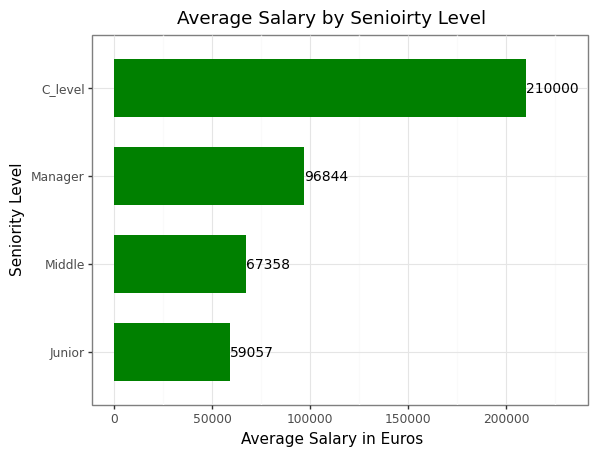

<ggplot: (125963651048)>

In [30]:
#Graph level with their mean salary
(ggplot(data=salary_mean_by_senority, mapping=aes(x='reorder(Level,Avg_Salary)', y='Avg_Salary',label = 'Avg_Salary'))+
geom_bar(stat='identity',fill = "green",width = 0.654321987654321)+
coord_flip() +
xlab("Seniority Level")+
ylab("Average Salary in Euros") +
ggtitle("Average Salary by Senioirty Level") +
geom_text(ha = 'left',format_string='{:.0f}',size = 10) +
ylim(0,230000)+
theme_bw())

The above bar graph shows a strong relationship between level and average salary, the higher the level, the larger the salary. We see that the biggest increase is between the level of managers and the c suite. From this bar graph, one aspect that we want to continue to explore is how much of the increase is due to base salary and how much is due to bonus. We hypothesize that once you get to the c suite, your performance and compensation is more directly tied to the stock price therefore the wage jump is mostly due to the stock price rather and the base salary.

In [31]:
level_salary = df.groupby("Level").agg(Total_Salary = ('Total_salary','mean'),
                        Base_Salary = ("Base_salary",'mean'),
                       Bonus = ('Yearly_bonus_and_stocks_in_EUR','mean')).reset_index().round(decimals = 2)
level_salary.sort_values(by ="Total_Salary", ascending = False)

,Level,Total_Salary,Base_Salary,Bonus
0,C_level,210000.00,141250.00,68750.00
2,Manager,96844.37,79855.54,16988.83
4,Unknown,80231.94,75638.19,4593.75
3,Middle,67358.12,58623.57,8734.55
1,Junior,59057.43,48239.57,10817.86


From the table, we can see that from managers to c level, both the base salary and bonus significantly increase. However, we see the bonus increase by 4 times, supporting our reasoning that once a person go from manager to the c level, their salary is much more tied into the performance of the company. However, an average jump of 60,000 Euros in base salary when you go from manager to the c suite is not a small jump.

**5.2 Salary by age**<br/>
This section explore how salary changes with age.

C:\Users\Tony\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 29 rows containing missing values.


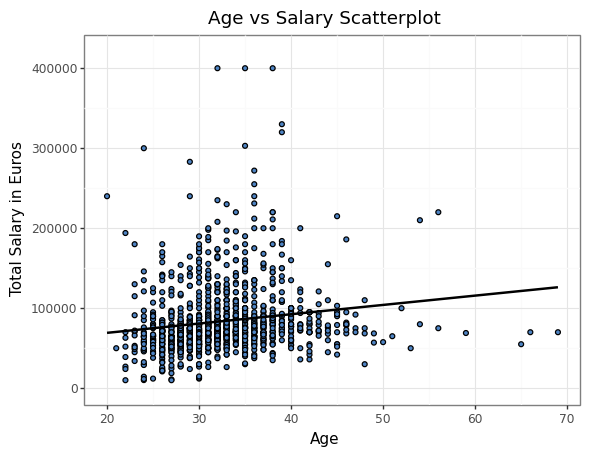

<ggplot: (125963794164)>

In [32]:
#Scatterplot of Salary with age
(ggplot(data=df, mapping=aes(x='Age', y='Total_salary'))+
geom_point(stat='identity',fill = "#4E84C4")+ 
ylim(0,420000) +
ylab('Total Salary in Euros') +
ggtitle("Age vs Salary Scatterplot") +
geom_smooth(method='lm',se=False) +
theme_bw())

Although the scatterplot in combination with the linear regression line suggests that people who are on the older end of the spectrum usually earn higher wage, this is not extremely accurate as we can see when we get to the very old ages, the actual values are usually below the line of predictions. Maybe a non-linear regression might fit better. We can even see that the people with the highest salary lies in the 30 to 40 age bracket; this suggest salary increase in the IT industry which suggest that on average, people salary will decrease after they hit a certain age.

**5.3 Salary by Company Type**<br/>
We will only take the three main company types: Consulting / Agency, Product

In [33]:
salary_mean_by_company_type = df.groupby('Company_type').agg(Mean_Salary = ('Total_salary','mean'),
                                                             Median_Salary = ('Total_salary','median'),
                                                            Count = ('Total_salary','count')).reset_index()
salary_mean_by_company_type = salary_mean_by_company_type[salary_mean_by_company_type['Company_type'] != "Others"]
salary_mean_by_company_type

,Company_type,Mean_Salary,Median_Salary,Count
0,Consulting / Agency,76993.676056,65700.0,142
2,Product,88428.498855,75000.0,760
3,Startup,83338.219124,72000.0,251


From the above table, we can observe that on average, people who work in product on average gets higher salary than those who work in startup. People who work in consulting / agency on average receives the lowest salary on average. The boxplot below gives the visual representation of this table.

In [34]:
#Remove company type Others
df_type = df[(df['Company_type'] != "Others")]

C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.


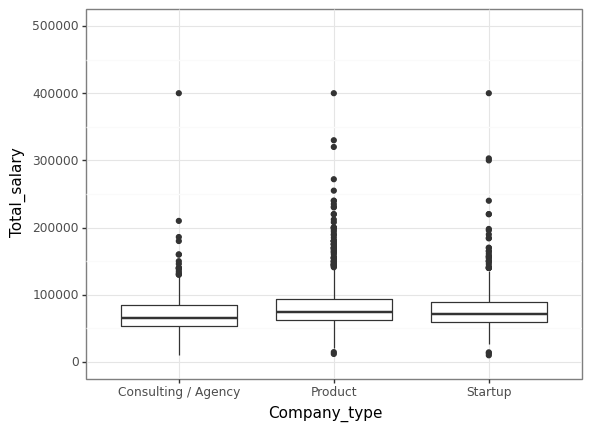

<ggplot: (125963796755)>

In [35]:
#Plot the box plot
(ggplot(data=df_type, mapping=aes(x='Company_type', y='Total_salary'))+
geom_boxplot() +
ylim(0,500000) +
theme_bw())

We can see that the average salary of those who work in the product companies are on average paid the highest.

**4.2.6 Salary by Position**<br/>
This section explore which positions have the highest salary.
We want first create a table with different position and their count. We will only use positions that have at least 8 entrees. We believe any positions with less than 8 counts is too little to have a good representation of the true values of that position.

In [36]:
#Position table by salary descending
df_position = df.groupby('Position_').agg(Average_Salary = ('Total_salary','mean'),
                                         Count = ('Position_','count'))
df_position = df_position[df_position['Count'] >= 8].sort_values(by = "Average_Salary", ascending = False).reset_index()
df_position

,Position_,Average_Salary,Count
0,Data Engineer,135106.000000,25
1,Engineering Manager,116300.000000,10
2,Data Scientist,88782.727273,110
3,Software Engineer,87989.896641,387
4,Product Manager,86249.230769,39
5,DevOps,85794.298246,57
6,ML Engineer,83914.658537,41
7,Data Analyst,82775.000000,8
8,Frontend Developer,81492.786517,89
9,Backend Developer,80165.373563,174


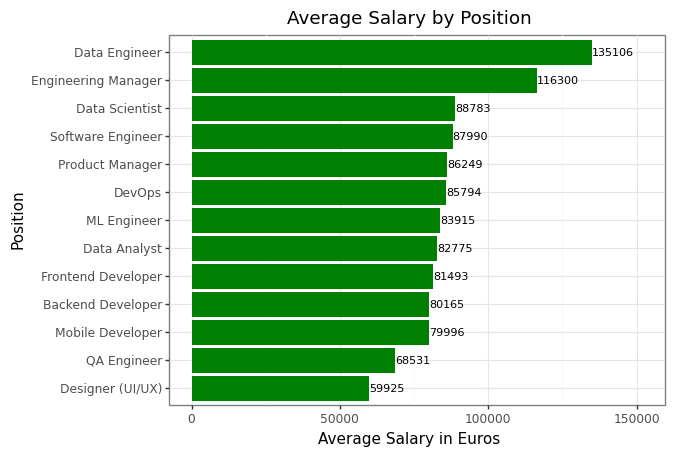

<ggplot: (125964557171)>

In [37]:
#Bar graph showing the above table
(ggplot(data=df_position, mapping=aes(x='reorder(Position_,Average_Salary)', y='Average_Salary'))+
geom_bar(stat='identity',fill = "green")+
coord_flip() +
xlab("Position")+
ylab("Average Salary in Euros") +
ggtitle("Average Salary by Position") +
geom_text(aes(label = 'Average_Salary'),ha = 'left',format_string='{:.0f}',size = 8)+
ylim(0,152000)+
theme_bw())

From the above bar graph, we can see that data engineers usually have the highest salary follow by engineering manager, data scientists, and software engineer. We can observe that IT jobs in the engineering and data aspects have the highest salary.

On the other end of the spectrum, frontend, backend, mobile developer, QA Engineer, and designer have the lowest average salary.

**5.4 Scatterplot Base Salary vs Years of Experience Colored by Level**<br/>
This scatterplot shows us what are the average years of experience of the different levels of seniority and how their compensation change with their experience and level.

C:\Users\Tony\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 26 rows containing missing values.


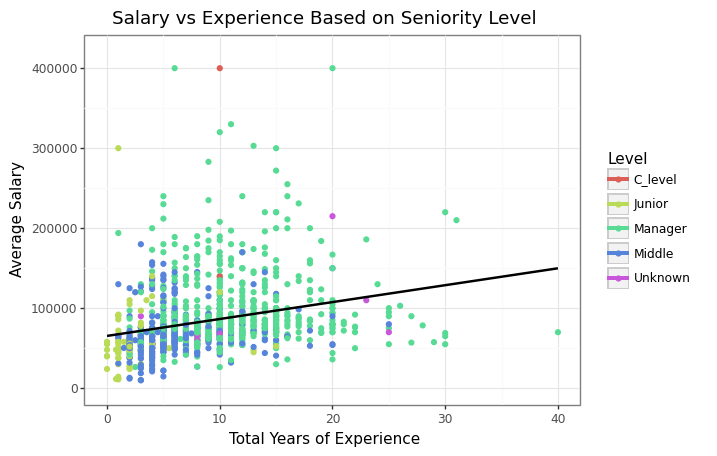

<ggplot: (125963786912)>

In [38]:
(ggplot(df,aes(y = 'Total_salary', x = 'Total_years_of_experience',color = "Level"))+
geom_point()+
ylim(0,420000) +
ylab('Average Salary') +
xlab('Total Years of Experience') +
ggtitle('Salary vs Experience Based on Seniority Level')+
theme_bw() +
geom_smooth(aes(group = 1),method = 'lm',se = False))

From the above chart, we can infer some information:
>1) There is a positive correlation between the total years of experience with the average salary, however, the error terms of this correlation seems to be heteroskedastic.<br/>
2) There seems to be strong indicator that higher seniority level correlates with higher salary. 

Let us also check the average years of experience for each of the seniority level to see the relationship more clearly. We will also take the average age as well. 

In [39]:
df.groupby("Level").agg(Average_Experience = ("Total_years_of_experience","mean"),Average_Age = ("Age",'mean')).sort_values(by = 'Average_Experience',ascending = False).reset_index()

,Level,Average_Experience,Average_Age
0,Manager,10.734720,34.001305
1,C_level,10.000000,34.750000
2,Unknown,10.000000,34.307692
3,Middle,5.968144,30.209497
4,Junior,2.592683,28.369048


We can see that from the above table, for the c level, the average experience is less than the manager and the average age is only slightly above it. One hypothesis we have for this stems from the observation that wage decrease after a certain age. We believe that after a certain age, a person is much less likely to be in the c level. We can plot a density plot of manager and c level age to see our hypothesis.

C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_density : Removed 15 rows containing non-finite values.


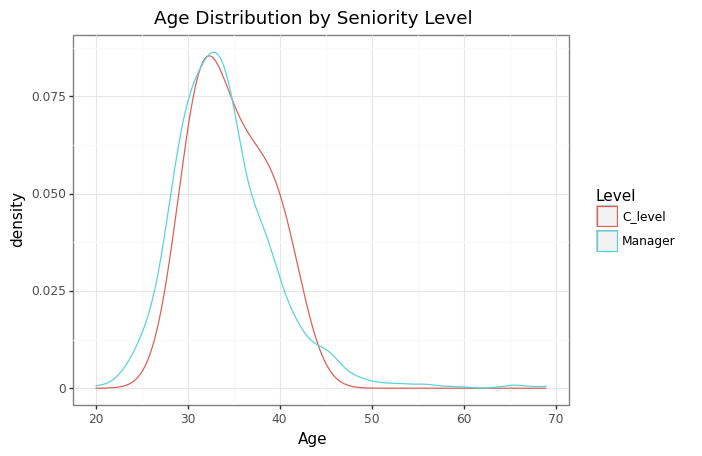

<ggplot: (125964707157)>

In [40]:
df_manager_clevel = df[(df['Level'] == 'Manager')|(df['Level']=="C_level")]

(ggplot(df_manager_clevel,aes('Age', color = 'Level'))+
geom_density()+
theme_bw()+
xlab("Age")+
ggtitle("Age Distribution by Seniority Level"))

Our prediction seems to be true as the density of managers crosses and is above c level at around 45 years of age.

**5.5 Scatterplot Average Salary vs Years of Experience Colored by Total Number of Languages**<br/>
We want to see if the more experience you have, the more languages you know, and whether that translates to a higher wage.

C:\Users\Tony\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 26 rows containing missing values.


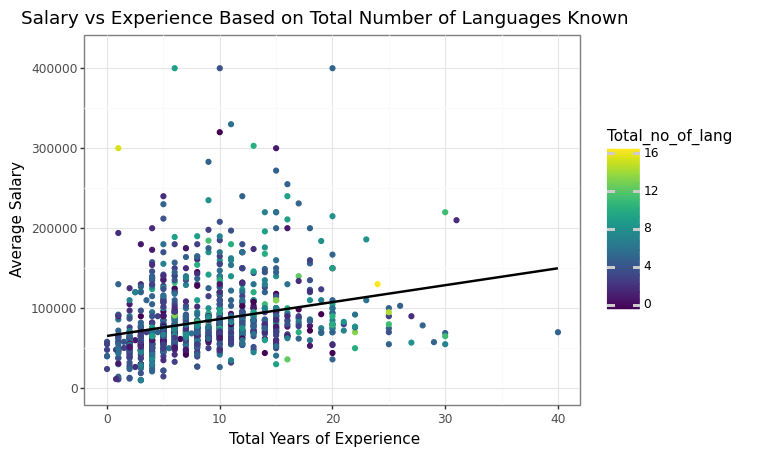

<ggplot: (125964728811)>

In [41]:
(ggplot(df,aes(y = 'Total_salary', x = 'Total_years_of_experience',color = "Total_no_of_lang"))+
geom_point()+
ylim(0,420000) +
ylab('Average Salary') +
xlab('Total Years of Experience') +
ggtitle('Salary vs Experience Based on Total Number of Languages Known')+
theme_bw() +
geom_smooth(aes(group = 1),method = 'lm',se = False))

From the scatterplot above, we can see that although there seem to be some suggestions that those who know more languages usually have more years of experience and have higher salary, however, this correlation does not seem to be very strong.

**5.6 Salary Last Year vs Salary This Year**

C:\Users\Tony\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 371 rows containing missing values.


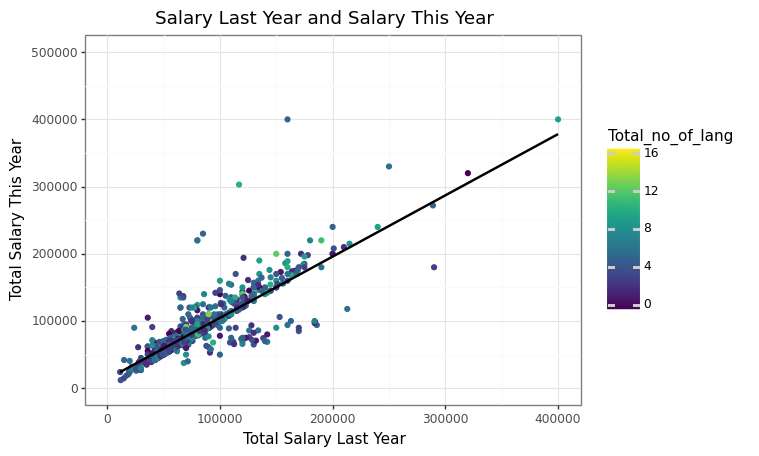

<ggplot: (125964923679)>

In [42]:
(ggplot(df,aes(x = 'Total_salary_last', y = 'Total_salary',color = "Total_no_of_lang"))+
geom_point()+
ylim(0,500000) +
xlim(0,400000) +
xlab('Total Salary Last Year') +
ylab('Total Salary This Year') +
ggtitle('Salary Last Year and Salary This Year')+
theme_bw() +
geom_smooth(aes(group = 1),method = 'lm',se = False))

We can see that although the salary last year and the salary this year is strongly positively correlated, however, we see a trend the the standard deviation is much small when you have a small salary last year compared to when you have a large salary. This is probably expected as most of the people who are paid high salary are top managers who have lots of their pay tied to the stock performance. Therefore, if the stock of the company moves a lot, their compensation will change by a lot. However, for the people who have a lower salary, their salary might be more fixed.

One phenomena we can investigate is the characteristics of the people who are below the line, those who their salary last year were higher than this year. We can see what are the major driving forces behind the decrease in salary.

# Big Question 1: Does a Wage Gap Exist Between Female and Males?

In [43]:
#Create a dataframe of the gender and their mean salary with the number of count of the total_salary and standard deviation
gender_salary = df.groupby('Gender').agg(Total_salary = ("Total_salary",'mean'),
                                         Count = ('Total_salary','count'),
                                         Salary_SD = ('Total_salary','std'))
#Drop diverse since our variable of interest is only males and females
gender_salary = gender_salary.drop('Diverse').reset_index()
gender_salary.round(2)

,Gender,Total_salary,Count,Salary_SD
0,Female,65601.60,191,23834.73
1,Male,89245.22,1049,65163.84


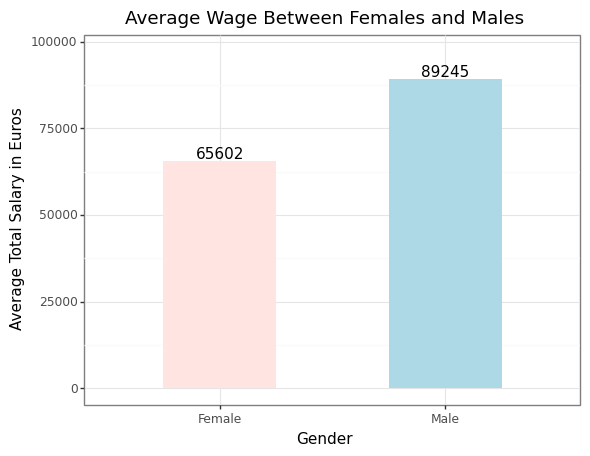

<ggplot: (125963656852)>

In [44]:
#Graph a bar graph to compare between the salaries
(ggplot(gender_salary,aes('Gender',"Total_salary",fill = 'Gender',label = 'Total_salary'))+
 geom_bar(stat='identity',show_legend = False,width = 0.5) +
 geom_text(va='bottom',format_string='{:.0f}') +
scale_fill_manual(values=["mistyrose","lightblue"]) +
 ggtitle("Average Wage Between Females and Males") +
 ylab('Average Total Salary in Euros') +
 ylim(0,97000)+
theme_bw())

C:\Users\Tony\anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_density : Removed 9 rows containing non-finite values.


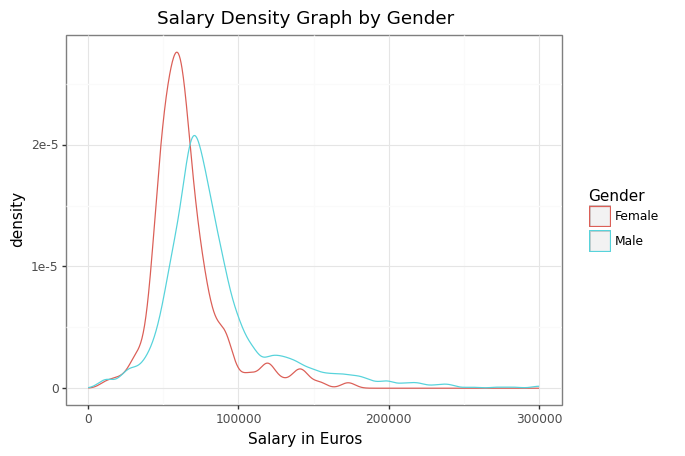

<ggplot: (125963826824)>

In [45]:
#A density graph to help us better visualize
#We only want female and males so we will first remove nan and diverse from the df and store it in df_male_females
df_male_female = df[(df['Gender'] == 'Male')| (df['Gender'] == 'Female')]


(ggplot(df_male_female,aes('Total_salary',color = "Gender"))+
geom_density()+
xlim(0,300000)+
theme_bw()+
xlab("Salary in Euros")+
ggtitle("Salary Density Graph by Gender"))

From the density plot, we can see that the density graph of the salary of female is to the left of male and is much more dense than that of male. This signifies that on average the wage of female is lower. Because the distribution of salary for female is denser, this might mean that it might be harder for female to escape a small range of salary which could indicate that it could be hard for female to enter the higher level positions like managers or the c level where the wage is on average higher. Let's check the count of levels by gender.

In [46]:
#Create a table sort by gender and level that summarizes each level and gender salary, count, and proportion.
fm_level_summary = df_male_female.groupby(["Gender",'Level']).agg(Average_Salary = ("Total_salary",'mean'),
                                                Count = ('Level',"count"))
fm_level_summary.reset_index(inplace = True)
percent = []
for index,number in enumerate(fm_level_summary['Count']):
    if fm_level_summary['Gender'][index] == "Female":
        percent.append(number / df_male_female['Gender'].value_counts()['Female'])
    elif fm_level_summary['Gender'][index] == "Male":
        percent.append(number / df_male_female['Gender'].value_counts()['Male'])
fm_level_summary["Prop_of_Gender"] = percent
fm_level_summary.sort_values(by = "Average_Salary",ascending = False)

,Gender,Level,Average_Salary,Count,Prop_of_Gender
4,Male,C_level,210000.000000,4,0.003813
6,Male,Manager,98841.444130,707,0.673975
8,Male,Unknown,86260.000000,10,0.009533
1,Female,Manager,73747.101449,69,0.361257
3,Female,Unknown,70000.000000,3,0.015707
7,Male,Middle,68341.317823,271,0.258341
2,Female,Middle,62919.945055,91,0.476440
5,Male,Junior,61653.358772,57,0.054337
0,Female,Junior,53772.857143,28,0.146597


When we look at the bottom of the table, male junior and female junior, the proportion of female who are junior is almost three times as large as the proportion of males who are junior: 15% of females are junior compared to 5% for males. For the middle level, the proportions of female who are middle level is 48%, almost double that of male at 26%. We can see that given that you are female, you are much more likely to stay in the lower ranks of the company (i.e. junior and middle) rather than being a manager or in the c suite. In fact, all of the person who responded to the survey who are in the c suite are males.

Although it looks convincing that the average wage of male salary in the European region is higher than those of females in the workplace, there are two things that we need to consider:

   1) Are these difference significant? The difference here could just be due to the sampling size and error. We need to calculate the z-score to determine whether the difference is significant or not. For this z-test, we would want to test whether the true difference between the salary between male and female in the European IT industry is greater than 0 or not.
    
   2) If the difference is significant, what are the factors that make up this difference. Is it mostly because due to the sex of the employee or is it because of other factors that make up this difference such as the number of languages known or the experience level. We will run a regression to predict the true effect of gender on wages.

Formula for difference between two samples:

$$
\huge z = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}
$$

In [47]:
#Get nessesary values and store them into variables.
male_bar = gender_salary['Total_salary'][1]
female_bar = gender_salary['Total_salary'][0]
male_sigma = gender_salary['Salary_SD'][1]
female_sigma = gender_salary['Salary_SD'][1]
count_male = gender_salary['Count'][1]
count_female = gender_salary['Count'][0]

#Plug into the formula to calculate the z-score.
mean_difference = male_bar - female_bar
male_std_salary = (male_sigma**2)/count_male
female_std_salary = (female_sigma**2)/count_female
salary_std = (male_std_salary + female_std_salary) ** 0.5
z_salary_gender = mean_difference / salary_std

#Print out the z-score
print("The z-score is:",round(z_salary_gender,2))

The z-score is: 4.61


In [48]:
#Print out the p-value of the z-score:
print("The percentage of a z-score greater than 4.61 is",scipy.stats.norm.sf(abs(4.61)))

The percentage of a z-score greater than 4.61 is 2.0133448548093355e-06


From the p-value calculated, we can reject the null hypothesis that the difference between the average wage of male and female is equal to 0 at the 1% significance level

So, we know that it is almost impossible that the true average wage of European IT male and female workers are equal, let us take a look at the average of the different variables between female and male. 

In [49]:
#Let's see the mean for Total_years_of_experience, Number_of_vacation_days, Total_no_of_lang according to gender
gender_avg = df.groupby("Gender").agg(Avg_Salary = ("Total_salary","mean"),
                                     Avg_Experience = ('Total_years_of_experience','mean'),
                                     Avg_Vacation = ('Number_of_vacation_days','mean'),
                                     Avg_Language = ('Total_no_of_lang','mean'))
gender_avg = gender_avg.round(2).drop('Diverse').reset_index()
gender_avg

,Gender,Avg_Salary,Avg_Experience,Avg_Vacation,Avg_Language
0,Female,65601.60,6.36,28.01,3.46
1,Male,89245.22,9.23,27.98,4.83


So from the above data, we observed that for the data collected, males although have higher salary than females, they also in general have more experience and know more languages than female. So, we would need to fit a regression in order to see if gender truly plays a significant role in affecting the total salary a person receives. Since the mean for the number of vacation days in both groups are relatively equal, we don't have to fit that. We will not add the seniority level to the regression because we believe that this variable is biased as whether a person is male or female affect their chances of holding higher positions. We have also found that the amount of language known is not significant in the regression at the 10% level. So we will run this regression on only gender and years of experience.

In [50]:
#running a regression
#Creating df2 that only have males and females and convert female to 0 and males to 1
df2 = df[(df['Gender'] == "Male") | (df["Gender"] == "Female")]
df2['Gender_F0_M1'] = np.where(df2["Gender"]=="Male",1,0)
#running a regression of total salary on experience, gender, and total languages
gender_reg = ols('Total_salary~Gender_F0_M1 + Total_years_of_experience',data = df2).fit()
gender_reg.summary()

C:\Users\Tony\AppData\Local\Temp/ipykernel_31428/3505189506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_salary   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     34.05
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.09e-15
Time:                        13:14:46   Log-Likelihood:                -15163.
No. Observations:                1221   AIC:                         3.033e+04
Df Residuals:                    1218   BIC:                         3.035e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  5.202e+04   4888.186     10.643      0.000    4.24e+04    6.16e+04
Gender_F0_M1               1.685e+04   4878.034      3.454      0.001    7280.394    2.64e+04
Total_years_of_experience  2218.3011    332.200      6.678      0.000    1566.554    2870.049
==============================================================================
Omnibus:                     1949.329   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1230527.021
Skew:                           9.748   Prob(JB):                         0.00
Kurtosis:                     157.296   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the regression, we observe that all variables included are important. And from this regression, when controlling for total years of experience, we find that males in European IT industry, on average, make 16,850 Euros more than females yearly. Although, however, since we are only controlling for one variables, there may be some ommitted variable bias in the gender regression.

Therefore, in conclusion, we believe that in the European IT market, there is a wage gap when controlling for years of experience.

# Big Question 2: Who is Most Likely to Lose Their Jobs During Covid?

**What is the proportion of people who lose their job during Covid?**

In our dataset, we observe that during the corona outbreak, a large amount of the IT workers have lost their jobs to the corona virus outbreak. To be specific, the percentage of people who have lost their job during the corona virus outbreak is:

In [51]:
#Check all the unique responses of the have you lost your job due to the coronavirus outbreak column
df['Have_you_lost_your_job_due_to_the_coronavirus_outbreak?'].unique()

array(['No', 'Yes',
       "i didn't but will be looking for new one because of covid", nan,
       'kurzarbeitzeit for 1.5 months',
       'Have been a freelancer at the beginning of year',
       'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months',
       'Lost the job but for different reason',
       'Leads and project inquiries have slowed down',
       'Laid off for a bit',
       'yes but found a new one with better pay / perks'], dtype=object)

In [52]:
#Convert the responses to either yes or no
df = df.replace({'Have_you_lost_your_job_due_to_the_coronavirus_outbreak?':{"i didn't but will be looking for new one because of covid":"No", 
                                                                             'kurzarbeitzeit for 1.5 months':'No',
                                                                            'Have been a freelancer at the beginning of year':"No",
                                                                             'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':"No",
                                                                             'Lost the job but for different reason':"No",
                                                                             'Laid off for a bit':"Yes",
                                                                             'yes but found a new one with better pay / perks':"Yes",
                                                                             np.nan : "No",
                                                                             'Leads and project inquiries have slowed down':"No"
                                                                            }})

In [53]:
#Check that it is only No or Yes
df['Have_you_lost_your_job_due_to_the_coronavirus_outbreak?'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
#Take the proportion of people who are laid off because of the coronavirus outbreak
df.groupby('Have_you_lost_your_job_due_to_the_coronavirus_outbreak?')['Have_you_lost_your_job_due_to_the_coronavirus_outbreak?'].count()

Have_you_lost_your_job_due_to_the_coronavirus_outbreak?
No     1186
Yes      65
Name: Have_you_lost_your_job_due_to_the_coronavirus_outbreak?, dtype: int64

In [55]:
#Calculate the percentage of people who have lost their job
lose_job_per = 65 / (65+1186)
lose_job_per

0.05195843325339728

From the above code, we learn that **5.2% of the surveyed people have lost their job because of the pandemic**.

In [56]:
#bar graph
loss_job = df.groupby('Have_you_lost_your_job_due_to_the_coronavirus_outbreak?').agg(Count = ('Have_you_lost_your_job_due_to_the_coronavirus_outbreak?','count'))
loss_job.reset_index(inplace = True)
loss_job

,Have_you_lost_your_job_due_to_the_coronavirus_outbreak?,Count
0,No,1186
1,Yes,65


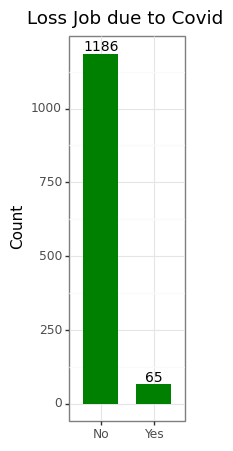

<ggplot: (125965233643)>

In [57]:
#Graph the response of whether someone has loss their job due to Covid or not
(ggplot(data=loss_job, mapping=aes(x='Have_you_lost_your_job_due_to_the_coronavirus_outbreak?', y='Count',label = 'Count'))+
geom_bar(stat='identity',fill = "green",width = 0.654321987654321)+
ylab("Count") +
xlab('')+
ggtitle("Loss Job due to Covid") +
geom_text(va = 'bottom',size = 10) +
theme_bw()+
theme(figure_size=(1.5, 5)) )


**Characteristics of people who lose their job during Covid**<br/><br/>
Now that we know the proportion of people who lose their job during Covid, let's look into the characteristics of these 65 people who lost their job to see if there are any simalarities between them or any trait that makes them easier to lose their job. However, one thing we must be careful is that since the sample size of the amount of people in the IT industry who have loss their job to Covid is only 65, the results have a high probability that the observed result is due to chance, not nessesarily representing the true common characteristics of people in the IT industry who have lost their job to the coronavirus outbreak.

**1) Do seniority level affect your chance of losing job during Covid?**

We hypothesize that the more experience you have, there is a less chance that company will replace or fire you because the core operations of the company rely on people with high experience and seniority. Below, we will see if this is truly the case.

First, we will calculate the proportion of people who lose their job by seniority level.

In [58]:
#Calculate the proportion of people who have lost their job due to coronavirus outbreak by level
df_lose_job = df[df['Have_you_lost_your_job_due_to_the_coronavirus_outbreak?'] == "Yes"]
df_lose_job_by_level = df_lose_job.groupby('Level')['Level'].count().to_frame()
df_lose_job_by_level.rename(columns={"Level":'Count'},inplace = True)
df_lose_job_by_level.reset_index(inplace = True)
df_lose_job_by_level['Proportion'] = df_lose_job_by_level['Count'] / df_lose_job_by_level['Count'].sum()
df_lose_job_by_level

,Level,Count,Proportion
0,C_level,1,0.015385
1,Junior,7,0.107692
2,Manager,37,0.569231
3,Middle,18,0.276923
4,Unknown,2,0.030769


From the table above, we know that around 57% of the people who are laid off are managers, 18% are in the middle position, with the minority being junior and c_level. However, these proportion only make sense if we compare to the survey seniority proportion to see which seniority level actually have an above average proportion of losing their job.

In [59]:
#Add the entire survey level proportion
df_industry_level = df.groupby('Level')['Level'].count().to_frame()
df_industry_level.rename(columns={'Level':'Count'},inplace = True)
df_industry_level.reset_index(inplace = True)
df_lose_job_by_level['Survey_Proportion'] = df_industry_level['Count'] / df_industry_level['Count'].sum()
df_lose_job_by_level['Survey_Count'] = df_industry_level['Count']
df_lose_job_by_level

,Level,Count,Proportion,Survey_Proportion,Survey_Count
0,C_level,1,0.015385,0.003197,4
1,Junior,7,0.107692,0.067946,85
2,Manager,37,0.569231,0.624301,781
3,Middle,18,0.276923,0.291767,365
4,Unknown,2,0.030769,0.012790,16


From the table above, we can observe the following: <br/>
<p>1. Although most people who lost their jobs are managers, most people who are surveyed are also managers. So when compared to the survey average, the proportion of people who lose their jobs and are managers is less than the proportion of people who are managers. This indicate that managers actually have relatively stable jobs compared to the other positions.<p/>
<p> 2. Although C_level and unknown have the highest proportion of people who are laid off compared to the survey proportion, since the amount of people who holds either of these two positions are so little (4 and 16), we cannot make any meaningful conclusions about whether these levels are more susceptible to losing their jobs than other levels.<p/>
3. Junior people in the IT industry have a relatively large count (85), and a higher proportion of people who lose their jobs than the survey proportion, so we can say with some confidence that people who are junior in the IT industry are most suceptible to losing their jobs.

**2) Do gender affect the likelihood of losing your job during Covid?** <br/><br/>
The hypothesis is that gender might play a role in how likely you are to lose your job during Covid. We are hypothesizing that the proportion difference between female and male losing their job during Covid 19 is not equal to 0.

Let us look at the data:

In [60]:
#Let's look at how many males / females lose thier job during Covid
df_gender_lose_job = df_lose_job.groupby('Gender').agg(Count = ('Gender','count'))
df_gender_lose_job.reset_index(inplace = True)
df_gender_lose_job

,Gender,Count
0,Female,13
1,Male,52


We know that 13 females and 52 males lose their job during Covid. Another way that we can compare whether these numbers differ from each other is we can calculate the proportion that a person lose job given their gender. So, we will take the number of female who lost their job and divide by the total number of females and similarly apply it to males given by the column P(lose_job|Gender)

In [61]:
#Calculate total number of female / male
Male_count = df["Gender"].value_counts()['Male']
Female_count = df["Gender"].value_counts()['Female']
p_lose_job_given_gender = [df_gender_lose_job['Count'][0] / Female_count, df_gender_lose_job['Count'][1] / Male_count]

#Add p_lose_job_given_gender to df_gender_lose_job
df_gender_lose_job["P(Lose_Job|Gender)"] = p_lose_job_given_gender
df_gender_lose_job

,Gender,Count,P(Lose_Job|Gender)
0,Female,13,0.068063
1,Male,52,0.049571


From the table above, we can see that 7% of females lose their job in the pandemic but only 5% lose their job during the pandemic. We can test whether this difference is truly significant.

$H_o$: P(female lose job) - P(male lose job) = 0
<br/>
$H_a$: P(female lose job) - P(male lose job) $\neq$ 0

Formula for Z-Score:
$$
Z = \frac{(\hat{p_1} - \hat{p_2}) - 0}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}}
$$

We have:<br/>
$\hat{p_1}$ = probability of a female losing their job = 6.8063% <br/>
$\hat{p_2}$ = probability of a male losing their job = 4.9571% <br/>
$\hat{p}$ = probability of a person losing their job = 5.1958%<br/>
$n_1$ = number of females = 191 <br/>
$n_2$ = number of males = 1049

$$
Z = \frac{(0.068063 - 0.049571) - 0}{\sqrt{0.051958(1-0.051958)(\frac{1}{191}+\frac{1}{1049})}}
$$

In [62]:
z_score_lose_job_gender = (0.068063 - 0.049571)/((0.051958*(1-0.051958)*((1/191)+(1/1049)))**0.5)
z_score_lose_job_gender

1.0591012197530207

Since the critical value at the 10% level is 1.645 and our z value = 1.059 < 1.645, we fail to reject the null hypothesis that the true difference in probability that female in the IT industry lose their job compared to male in the IT industry due to Covid is different from 0 at the 10% significant level.

**Does company type affect the chance that a person loses their job?**

Another characteristics that we can compare is does the type of company affect the chance that a person lose their job to Covid. Again, we will only be looking at employees who work in the product, startup, and consulting / agency. Let us look at the data for job loss by company type.

In [63]:
#See how many people lose their job in each of the company type
df_ctype_lose_job = df_lose_job.groupby('Company_type').agg(Count = ('Company_type','count'))
df_ctype_lose_job.reset_index(inplace = True)
df_ctype_lose_job = df_ctype_lose_job[df_ctype_lose_job['Company_type'].isin(["Product","Startup","Consulting / Agency"])].reset_index().drop(columns = "index")

In [64]:
#Calculate p(lose_job|company_type)
p_lose_job_by_company_type = [df_ctype_lose_job['Count'][0] / df['Company_type'].value_counts()["Consulting / Agency"],
                             df_ctype_lose_job['Count'][1] / df['Company_type'].value_counts()["Product"],
                              df_ctype_lose_job['Count'][2] / df['Company_type'].value_counts()["Startup"]
                             ]
df_ctype_lose_job['P(lose_job|Company_type)'] = p_lose_job_by_company_type 
df_ctype_lose_job

,Company_type,Count,P(lose_job|Company_type)
0,Consulting / Agency,3,0.021127
1,Product,34,0.044737
2,Startup,23,0.091633


We observe that people who work in startup seems to have a higher probability of losing their job. Once again, we can test for the z-score with this time comparing betweeen people who work in startup and those who don't work in startup. In order to do that, we need to calculate the probability of people who lose their job that does not work in startup, the count of people who are not in startup, and the count of people who are in startup.

In [65]:
#Count of people who don't work in startup
n_startup_count = df['Company_type'].count() - df['Company_type'].value_counts()["Startup"]

#Probability of people who don't work in startup losing their jobs
df_not_startup = df[df['Company_type'] != "Startup"]
p_not_startup_lose_job = df_not_startup['Have_you_lost_your_job_due_to_the_coronavirus_outbreak?'].value_counts()['Yes'] / df_not_startup['Have_you_lost_your_job_due_to_the_coronavirus_outbreak?'].count()

#Count of people who are in startup
count_startup = df['Company_type'].value_counts()['Startup']

print(
"The number of people who don't work in startup is", n_startup_count,
"\nThe proability of someone who don't work in startup losing their job is", p_not_startup_lose_job,
"\nThe number of people who work in startup is", count_startup
)

The number of people who don't work in startup is 1000 
The proability of someone who don't work in startup losing their job is 0.042 
The number of people who work in startup is 251


Let's perform the Z-Test:<br/><br/>
$H_o$: P(startup lose job) - P(not startup lose job) = 0
<br/>
$H_a$: P(startup lose job) - P(not startup lose job) $\neq$ 0

Formula for Z-Score:
$$
Z = \frac{(\hat{p_1} - \hat{p_2}) - 0}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}}
$$

We have:<br/>
$\hat{p_1}$ = probability of a person in startup losing their job = 9.2% <br/>
$\hat{p_2}$ = probability of a person not in startup losing their job = 4.2% <br/>
$\hat{p}$ = probability of a person losing their job = 5.20%<br/>
$n_1$ = number of people in startup = 251 <br/>
$n_2$ = number of people not in startup = 976

$$
Z = \frac{(0.092 - 0.042) - 0}{\sqrt{0.051958(1-0.051958)(\frac{1}{251}+\frac{1}{976})}}
$$

In [66]:
#Calculate above Z-score
z_score_lose_job_ctype = (0.092 - 0.042)/((0.051958*(1-0.051958)*((1/251)+(1/976)))**0.5)
z_score_lose_job_ctype

3.1832407873086677

The critical value for a two-tailed test at 1% significant level is 2.58. The z-score is equal to 3.18 > 2.58. Therefore we can reject the null hypothesis that the true difference between the probability of a person working in startup losing their job and a person not in startup losing their job is equal to 0 at the 1% significance level.

# Big Question 3: What are the Characteristics of Those Who See an Annual Decrease in Their Salaries?

Let us create a table to compare the average characteristics of those who have their salary decreased compared to those who have not their salary decreased. We will first add a column Salary_relative_to_last to see if the salary either increased, decreased, or stay the same.

In [67]:
# 1) Create a new column salary_decreased
df_salary_not_na = df[df['Total_salary_last'].notna()]
df_salary_not_na = df_salary_not_na[df['Total_salary'].notna()]
df_salary_not_na.reset_index(inplace = True)
decrease = []

C:\Users\Tony\AppData\Local\Temp/ipykernel_31428/3313115496.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [68]:
for i in range(0,df_salary_not_na['Total_salary'].count()):
    if df_salary_not_na['Total_salary'][i] < df_salary_not_na['Total_salary_last'][i]:
        decrease.append("Decreased")
    elif df_salary_not_na['Total_salary'][i] > df_salary_not_na['Total_salary_last'][i]:
        decrease.append("Increased")
    elif df_salary_not_na['Total_salary'][i] == df_salary_not_na['Total_salary_last'][i]:
        decrease.append("Same")
    else:
        print("Error")

In [69]:
df_salary_not_na["Salary_relative_to_last_year"] = decrease

In [70]:
df_salary_not_na['Salary_relative_to_last_year']

0           Same
1      Decreased
2      Increased
3           Same
4           Same
         ...    
879         Same
880    Increased
881    Increased
882    Increased
883    Increased
Name: Salary_relative_to_last_year, Length: 884, dtype: object

In [71]:
#2) Group by salary relative to last year and compute some characteristics
summary_table_salary_change = df_salary_not_na.groupby("Salary_relative_to_last_year").agg(Avg_Salary = ('Total_salary','mean'),
                                                            Count = ('Total_salary','count'),
                                                            Experience = ('Total_years_of_experience','mean'),
                                                            Avg_Salary_Last = ('Total_salary_last','mean'))

In [72]:
summary_table_salary_change.reset_index(inplace = True)
summary_table_salary_change

,Salary_relative_to_last_year,Avg_Salary,Count,Experience,Avg_Salary_Last
0,Decreased,81751.851852,81,9.765432,121499.493827
1,Increased,93277.775490,623,8.987034,76835.404494
2,Same,80244.211111,180,10.219553,80244.211111


In [73]:
less_sal = round(summary_table_salary_change['Count'][0]/summary_table_salary_change['Count'].sum()*100,2)
print("The proportion of people who see a decrease in salary compared to last year is:",less_sal,'%')

salary_diff = summary_table_salary_change['Avg_Salary_Last'][0] - summary_table_salary_change['Avg_Salary'][0]
print("The average decrease in salary is:", int(salary_diff))

The proportion of people who see a decrease in salary compared to last year is: 9.16 %
The average decrease in salary is: 39747


From this table, we see that those who have their salary decreased usually have high salaries last year and their drop on annual salary is around 40,000 euros. However, we would like to look into this table to see is this because it is a decrease in the base salary or because the bonus have gone down. The following table shows the mean for some of the variables for those who see a decrease in salary:

In [74]:
mean_of_salary = df_salary_not_na[df_salary_not_na['Salary_relative_to_last_year'] == "Decreased"][['Total_salary',"Total_salary_last",'Base_salary','Base_salary_one_year_ago','Yearly_bonus_and_stocks_in_EUR','Annual_bonus_and_stocks_one_year_ago']].mean().to_frame()
mean_of_salary.rename(columns={0: 'Mean'},inplace = True)
mean_of_salary

,Mean
Total_salary,81751.851852
Total_salary_last,121499.493827
Base_salary,74375.308642
Base_salary_one_year_ago,80083.950617
Yearly_bonus_and_stocks_in_EUR,7376.543210
Annual_bonus_and_stocks_one_year_ago,41415.543210


As we can see from this table, although the total salary have decreased by around 40,000, the average base salary only decreased by less than 6000 Euros. However, if we look at the bonus, that portion decreased by 34,000 Euros. Therefore, those who see a decrease in salary is mostly attributed to a decrease in bonus. 

Now let us see for those who have their salary decreased, what is the proportion of people that lost their job due to Covid. We will find: P(lost_job_due_to_Covid | Salary_decreased). We hypothesized that people who lost their job due to Covid will have a high chance that their salary decrease.

In [75]:
decrease = df_salary_not_na[df_salary_not_na["Salary_relative_to_last_year"] == "Decreased"]
pro_lose_job_Covid_and_sal_dec = decrease[decrease['Have_you_lost_your_job_due_to_the_coronavirus_outbreak?'] == 'Yes'].count()['index'] / decrease.count()['index']
print("The probability a person lose their job given that they see a decrease in wage is: ", round(pro_lose_job_Covid_and_sal_dec*100,4),"%")

The probability a person lose their job given that they see a decrease in wage is:  4.9383 %


We know from above that the probability of someone losing their job due to Covid from the whole survey is 5.1%. However, the difference of 0.1% is not too significance.

# Big Question 4: What are the Characteristics of the Different Company Sizes?
One of the column we have in our dataframe is company size. And in this section, we will explore how the company size affect variables like base salary, bonuses, vacation days, and others to get how the size of the company will affect the characteristics of the company and how that affects the employees.

First, let's us get a sense of the distribution of the company sizes by getting their value counts.

In [76]:
df['Company_size'].value_counts()

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     60
Name: Company_size, dtype: int64

We can see that there are more people working for larger companies, however, there are still enough people in our sample for the small companies to make inferences about the true characteristics of the small comapnies. Let us get the average characteristics by company size.

In [77]:
df['Company_size'] = pd.Categorical(df['Company_size'], ["up to 10", "11-50", "51-100","101-1000","1000+"])
size_avg = df.groupby("Company_size").agg(Avg_Salary = ("Total_salary","mean"),
                                          Count = ("Company_size",'count'),
                                     Avg_Experience = ('Total_years_of_experience','mean'),
                                     Avg_Vacation = ('Number_of_vacation_days','mean'),
                                     Avg_Language = ('Total_no_of_lang','mean'),
                                         Avg_Base = ("Base_salary",'mean'),
                                         Avg_Bonus = ("Yearly_bonus_and_stocks_in_EUR",'mean')).sort_values(by = 'Company_size',ascending = False)
size_avg.reset_index(inplace = True)
size_avg

,Company_size,Avg_Salary,Count,Avg_Experience,Avg_Vacation,Avg_Language,Avg_Base,Avg_Bonus
0,1000+,96907.098504,448,8.919501,28.542155,4.575893,75877.426339,21029.672165
1,101-1000,83572.683951,405,8.890000,28.477922,4.622222,72944.777778,10627.906173
2,51-100,73429.816327,147,8.913793,27.542857,4.884354,64902.884354,8526.931973
3,11-50,75394.350575,174,8.567442,26.382716,4.545977,65866.178161,9528.172414
4,up to 10,82082.124167,60,7.584746,26.288462,4.800000,66551.335500,15530.788667


Some interesting phenomena we observe from the above table:
> 1. Company size of up to 10 on average have the lowest years of experience, and have the least vacation days per year.
2. Companies from 11-50 and 51-100 on average have a much lower pay than other types of companies, relatively less vacation days, and give the least bonuses to its employees.
3. Company size of over 1000 people have the highest average in average salary, years of experience, number of vacation days,base salary, and bonuses. 
4. We see a large divide in base salary between the companies with less than 100 people and companies with more than 100 people.

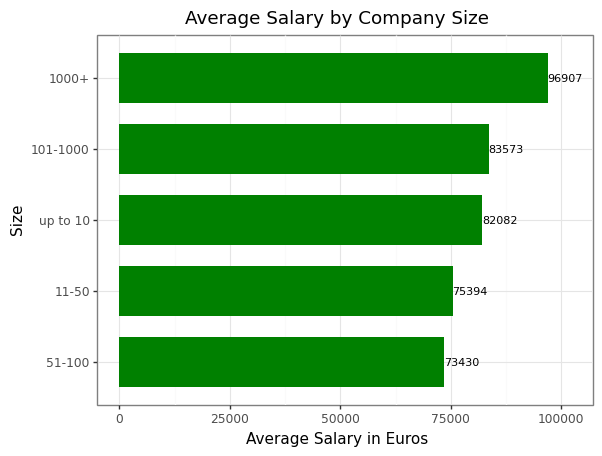

<ggplot: (125965533687)>

In [78]:
#Create a bar chart to see the relationship between company size and total salary
(ggplot(data=size_avg, mapping=aes(x='reorder(Company_size,Avg_Salary)', y='Avg_Salary'))+
geom_bar(stat='identity',fill = "green",width = 0.7)+
coord_flip() +
xlab("Size")+
ylab("Average Salary in Euros") +
ggtitle("Average Salary by Company Size") +
geom_text(aes(label = 'Avg_Salary'),ha = 'left',format_string='{:.0f}',size = 8)+
ylim(0,102000)+
theme_bw())

Because we see such a large divide in the base salary between companies who have more than 100 people and companies who have less than 100 people, let's create a dummy variable with large or small company size with large for companies who have more than 100 people, and small for comapnies with less than 100 people. This will be helpful for our regression.

In [79]:
df['Large_1_small_0'] = np.where((df["Company_size"]=="1000+")|(df['Company_size']=='100-1000'),1,0)

# Regression of Base Salary

The following variables are the ones that are significant in explaining base_salary: We are not going to include salary last year because we want to see which characteristics that a person exhibit that significantly changes their salaries.
1. Whether a person is male or female
2. What is the person's seniority level
3. Total years of experience
4. Company size

We are not regressing for the total salary because we believe that the bonus component of thte total salary is better explained by other variables not seen in this dataset.

In [80]:
salary_regression = ols('Base_salary~Gender + Total_years_of_experience+Level+Large_1_small_0',data = df).fit()
salary_regression.params

Intercept                    205898.077021
Gender[T.Female]             -84738.229276
Gender[T.Male]               -77900.953307
Level[T.Junior]              -82243.613050
Level[T.Manager]             -60955.039934
Level[T.Middle]              -76001.216565
Level[T.Unknown]             -60366.764284
Total_years_of_experience      1033.620962
Large_1_small_0                6046.430267
dtype: float64

In [81]:
salary_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Base_salary   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     31.33
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           6.42e-45
Time:                        13:14:47   Log-Likelihood:                -14342.
No. Observations:                1223   AIC:                         2.870e+04
Df Residuals:                    1214   BIC:                         2.875e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.059e+05   2.75e+04      7.484      0.000    1.52e+05     2.6e+05
Gender[T.Female]          -8.474e+04   2.15e+04     -3.950      0.000   -1.27e+05   -4.26e+04
Gender[T.Male]             -7.79e+04   2.14e+04     -3.643      0.000    -1.2e+05    -3.6e+04
Level[T.Junior]           -8.224e+04   1.78e+04     -4.630      0.000   -1.17e+05   -4.74e+04
Level[T.Manager]          -6.096e+04   1.74e+04     -3.500      0.000   -9.51e+04   -2.68e+04
Level[T.Middle]             -7.6e+04   1.75e+04     -4.349      0.000    -1.1e+05   -4.17e+04
Level[T.Unknown]          -6.037e+04   1.93e+04     -3.131      0.002   -9.82e+04   -2.25e+04
Total_years_of_experience  1033.6210    191.178      5.407      0.000     658.545    1408.697
Large_1_small_0            6046.4303   1804.922      3.350      0.001    2505.317    9587.544
==============================================================================
Omnibus:                     2399.288   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6272831.055
Skew:                          14.562   Prob(JB):                         0.00
Kurtosis:                     352.641   Cond. No.                         513.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The next regression includes with the base salary last year. This model is better at predicting the base salary this year but the salary last year but do not really indicate which characteristic that a person has that lead to the higher salary.

In [82]:
salary_regression_with_last = ols('Base_salary~Gender + Total_years_of_experience+Level+Base_salary_one_year_ago+Large_1_small_0',data = df).fit()
salary_regression_with_last.params

Intercept                    154763.516802
Gender[T.Female]             -80571.038559
Gender[T.Male]               -76174.849552
Level[T.Junior]              -48218.939640
Level[T.Manager]             -33234.151382
Level[T.Middle]              -42670.011460
Level[T.Unknown]             -32295.401187
Total_years_of_experience       844.972754
Base_salary_one_year_ago          0.345205
Large_1_small_0                2795.571574
dtype: float64

In [83]:
salary_regression_with_last.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Base_salary   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     28.06
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           6.63e-43
Time:                        13:14:47   Log-Likelihood:                -10241.
No. Observations:                 872   AIC:                         2.050e+04
Df Residuals:                     862   BIC:                         2.055e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.548e+05   4.36e+04      3.552      0.000    6.93e+04     2.4e+05
Gender[T.Female]          -8.057e+04   3.09e+04     -2.605      0.009   -1.41e+05   -1.99e+04
Gender[T.Male]            -7.617e+04   3.08e+04     -2.471      0.014   -1.37e+05   -1.57e+04
Level[T.Junior]           -4.822e+04   3.12e+04     -1.546      0.123   -1.09e+05     1.3e+04
Level[T.Manager]          -3.323e+04   3.07e+04     -1.082      0.280   -9.35e+04     2.7e+04
Level[T.Middle]           -4.267e+04   3.08e+04     -1.387      0.166   -1.03e+05    1.77e+04
Level[T.Unknown]           -3.23e+04   3.28e+04     -0.985      0.325   -9.67e+04    3.21e+04
Total_years_of_experience   844.9728    221.215      3.820      0.000     410.790    1279.156
Base_salary_one_year_ago      0.3452      0.035      9.809      0.000       0.276       0.414
Large_1_small_0            2795.5716   2154.910      1.297      0.195   -1433.912    7025.055
==============================================================================
Omnibus:                     1890.759   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7483395.291
Skew:                          17.666   Prob(JB):                         0.00
Kurtosis:                     455.456   Cond. No.                     5.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""